In [1]:
%matplotlib inline
from io import StringIO
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [73]:
# https://docs.google.com/spreadsheets/d/1c5yGydEANMzHjBufTzph0w-WGwJyiwPMRYz3yBZatb4/edit#gid=0
# Keras benchmarks, our measurements, inception3
table = StringIO("""model	method	machine	GPUs	PS	images/sec	speedup	efficiency
inception3	kuza55	az-2x-m60	1	GPU	31.71	1.00	100.00
inception3	kuza55	az-2x-m60	2	CPU	53.35	1.68	84.12
inception3	kuza55	az-2x-m60	2	GPU	53.33	1.68	84.09
inception3	kuza55	7gforce	1	GPU	39.07	1.00	100.00
inception3	kuza55	7gforce	2	CPU	49.01	1.25	62.72
inception3	kuza55	7gforce	4	CPU	60.38	1.55	38.64
inception3	kuza55	7gforce	6	CPU	NaN	NaN	NaN
inception3	kuza55	7gforce	2	GPU	57.15	1.46	73.14
inception3	kuza55	7gforce	4	GPU	33.00	0.84	21.12
inception3	kuza55	7gforce	6	GPU	NaN	NaN	NaN
inception3	avolkov1	az-2x-m60	1	GPU	31.67	1.00	100.00
inception3	avolkov1	az-2x-m60	2	CPU	54.58	1.72	86.17
inception3	avolkov1	az-2x-m60	2	GPU	53.20	1.68	83.99
inception3	avolkov1	7gforce	1	GPU	41	1.00	100.00
inception3	avolkov1	7gforce	2	CPU	50.1	1.22	61.10
inception3	avolkov1	7gforce	4	CPU	64.05	1.56	39.05
inception3	avolkov1	7gforce	6	CPU	65.37	1.59	26.57
inception3	avolkov1	7gforce	2	GPU	55.57	1.36	67.77
inception3	avolkov1	7gforce	4	GPU	32.23	0.79	19.65
inception3	avolkov1	7gforce	6	GPU	21.33	0.52	8.67
inception3	tf_cnn_benchmarks	az-2x-m60	1	GPU	47.49	1.00	100.00
inception3	tf_cnn_benchmarks	az-2x-m60	2	CPU	95.43	2.01	100.47
inception3	tf_cnn_benchmarks	az-2x-m60	2	GPU	94.72	1.99	99.73
inception3	tf_cnn_benchmarks	7gforce	1	GPU	78.44	1.00	100.00
inception3	tf_cnn_benchmarks	7gforce	2	CPU	118.32	1.51	75.42
inception3	tf_cnn_benchmarks	7gforce	4	CPU	236.86	3.02	75.49
inception3	tf_cnn_benchmarks	7gforce	6	CPU	351.98	4.49	74.79
inception3	tf_cnn_benchmarks	7gforce	2	GPU	126.68	1.61	80.75
inception3	tf_cnn_benchmarks	7gforce	4	GPU	180.92	2.31	57.66
inception3	tf_cnn_benchmarks	7gforce	6	GPU	NaN	NaN	NaN
resnet50	kuza55	az-2x-m60	1	GPU	41.69	1.00	100.00
resnet50	kuza55	az-2x-m60	2	CPU	71.72	1.72	86.02
resnet50	kuza55	az-2x-m60	2	GPU	67.18	1.61	80.57
resnet50	kuza55	7gforce	1	GPU	54.52	1.00	100.00
resnet50	kuza55	7gforce	2	CPU	55.09	1.01	50.52
resnet50	kuza55	7gforce	4	CPU	66.55	1.22	30.52
resnet50	kuza55	7gforce	6	CPU	NaN	NaN	NaN
resnet50	kuza55	7gforce	2	GPU	67.34	1.24	61.76
resnet50	kuza55	7gforce	4	GPU	33.29	0.61	15.27
resnet50	kuza55	7gforce	6	GPU	NaN	NaN	NaN
resnet50	avolkov1	az-2x-m60	1	GPU	41.64	1.00	100.00
resnet50	avolkov1	az-2x-m60	2	CPU	71.73	1.72	86.13
resnet50	avolkov1	az-2x-m60	2	GPU	68.78	1.65	82.59
resnet50	avolkov1	7gforce	1	GPU	58.19	1.00	100.00
resnet50	avolkov1	7gforce	2	CPU	56.02	0.96	48.14
resnet50	avolkov1	7gforce	4	CPU	67.33	1.16	28.93
resnet50	avolkov1	7gforce	6	CPU	68.21	1.17	19.54
resnet50	avolkov1	7gforce	2	GPU	66.9	1.15	57.48
resnet50	avolkov1	7gforce	4	GPU	33.43	0.57	14.36
resnet50	avolkov1	7gforce	6	GPU	21.56	0.37	6.18
resnet50	tf_cnn_benchmarks	az-2x-m60	1	GPU	77.94	1.00	100.00
resnet50	tf_cnn_benchmarks	az-2x-m60	2	CPU	151.65	1.95	97.29
resnet50	tf_cnn_benchmarks	az-2x-m60	2	GPU	149.51	1.92	95.91
resnet50	tf_cnn_benchmarks	7gforce	1	GPU	119.8	1.00	100.00
resnet50	tf_cnn_benchmarks	7gforce	2	CPU	196	1.64	81.80
resnet50	tf_cnn_benchmarks	7gforce	4	CPU	364.32	3.04	76.03
resnet50	tf_cnn_benchmarks	7gforce	6	CPU	571.9	4.77	79.56
resnet50	tf_cnn_benchmarks	7gforce	2	GPU	NaN	NaN	NaN
resnet50	tf_cnn_benchmarks	7gforce	4	GPU	NaN	NaN	NaN
resnet50	tf_cnn_benchmarks	7gforce	6	GPU	NaN	NaN	NaN
""")
df = pd.read_csv(table, sep='\t')

In [71]:
df

,model,method,machine,GPUs,PS,images/sec,speedup,efficiency
0,inception3,kuza55,az-2x-m60,1,GPU,31.71,1.00,100.00
1,inception3,kuza55,az-2x-m60,2,CPU,53.35,1.68,84.12
2,inception3,kuza55,az-2x-m60,2,GPU,53.33,1.68,84.09
3,inception3,kuza55,7gforce,1,GPU,39.07,1.00,100.00
4,inception3,kuza55,7gforce,2,CPU,49.01,1.25,62.72
5,inception3,kuza55,7gforce,4,CPU,60.38,1.55,38.64
6,inception3,kuza55,7gforce,6,CPU,NaN,NaN,NaN
7,inception3,kuza55,7gforce,2,GPU,57.15,1.46,73.14
8,inception3,kuza55,7gforce,4,GPU,33.00,0.84,21.12
9,inception3,kuza55,7gforce,6,GPU,NaN,NaN,NaN


In [63]:
def select(model, method, machine, ps):
    return df[(df['model']==model) & (df['method']==method) & (df['machine']==machine) & ((df['PS']==ps) | (df['GPUs']==1))]

In [40]:
def plot_table(model, method, ps, metric):
    fig = plt.figure(figsize=(15,5))
    title = '%s - %s/imagenet-synth - PS=%s - %s' % (method, model, ps, metric)
    plt.suptitle(title)
    plt.xlabel('number of GPUs')
    plt.ylabel(metric)
    gpu_count = df['GPUs'].max()
    x_ideal = 1+np.arange(gpu_count)
    if metric == 'speedup':
        y_ideal = 1+np.arange(gpu_count)
    elif metric == 'efficiency':
        y_ideal = 100 * np.ones(gpu_count) # %
    plt.bar(x_ideal, y_ideal, alpha=0.25, label='ideal')
    d = select(model, method, 'az-2x-m60', ps)
    plt.plot(d['GPUs'], d[metric], 'o-', label='az-2x-m60')
    d = select(model, method, '7gforce', ps)
    plt.plot(d['GPUs'], d[metric], 'o-', label='7gforce')
    plt.grid(True)
    plt.legend()
    plt.savefig('%s_%s_%s.png' % (model, method, metric))

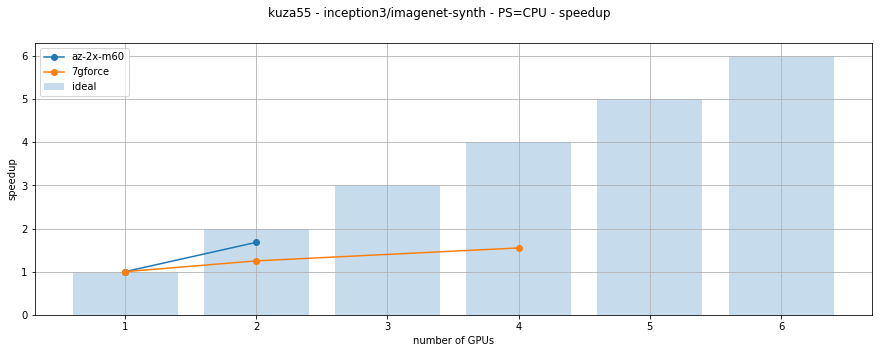

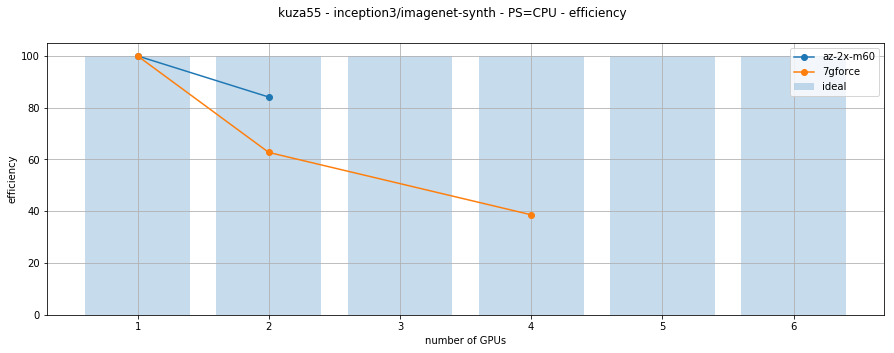

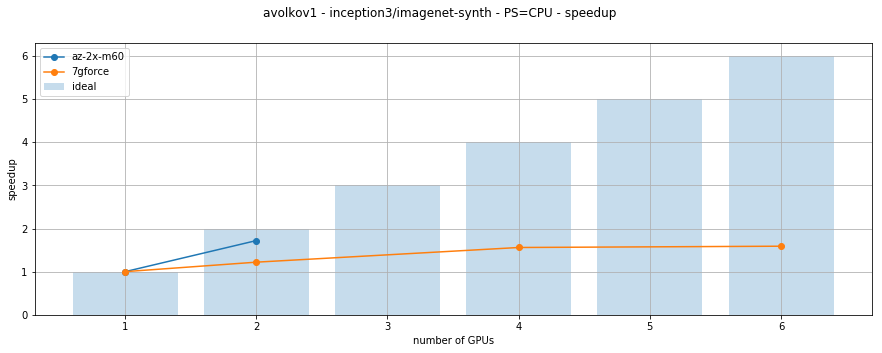

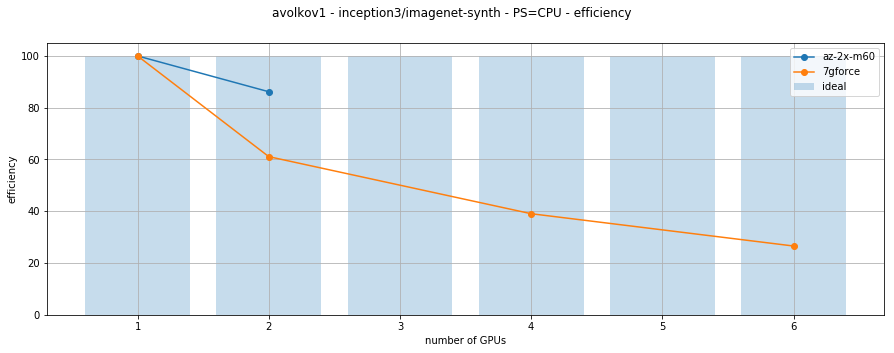

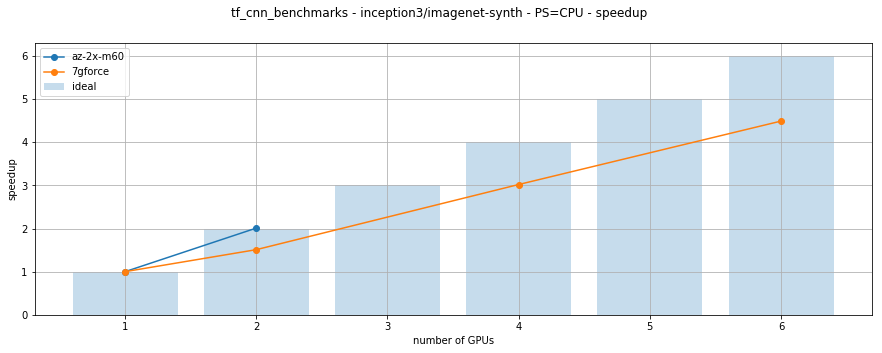

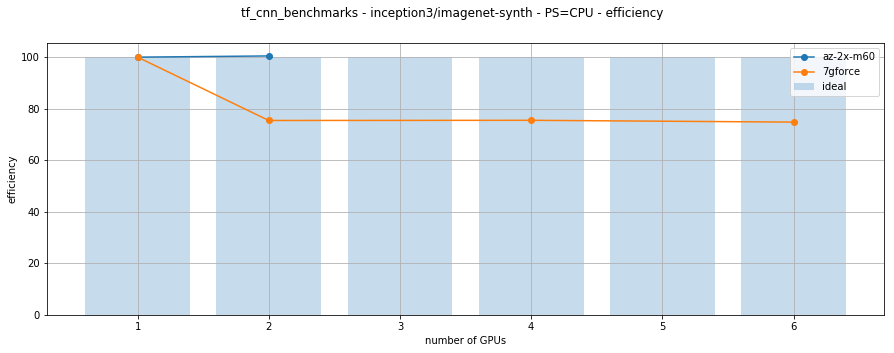

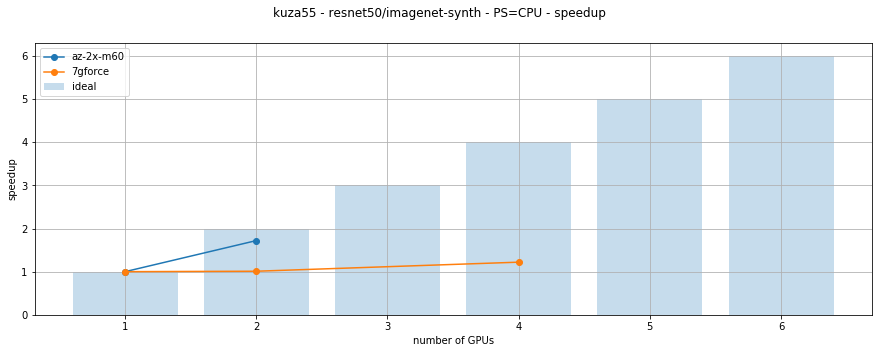

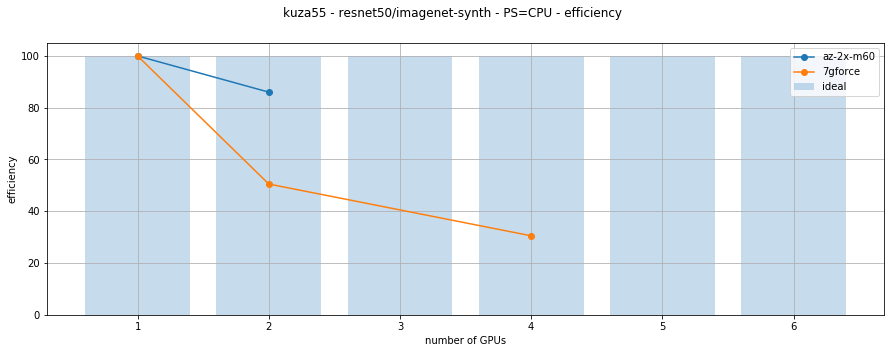

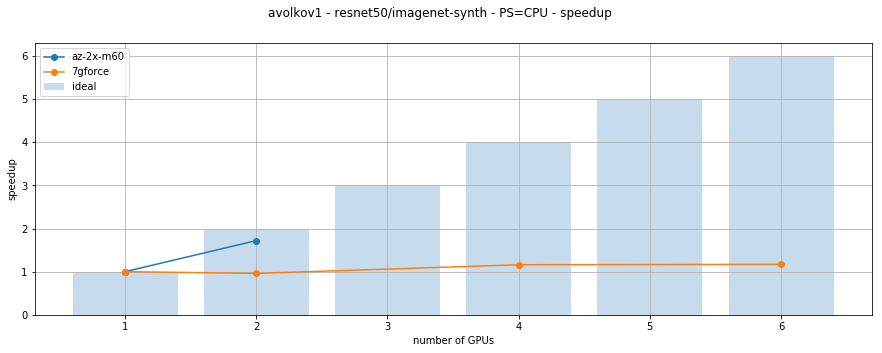

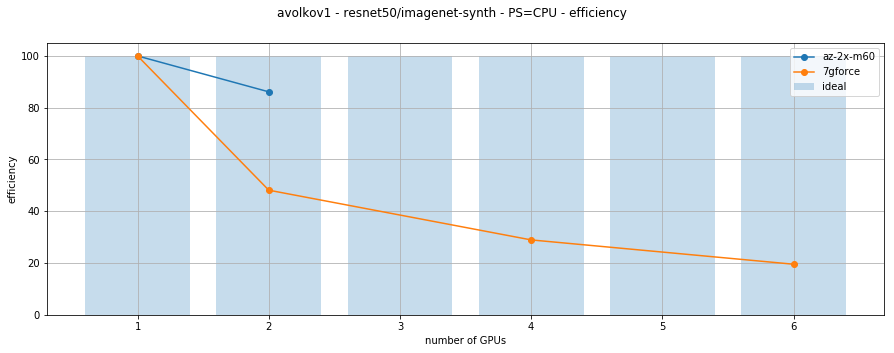

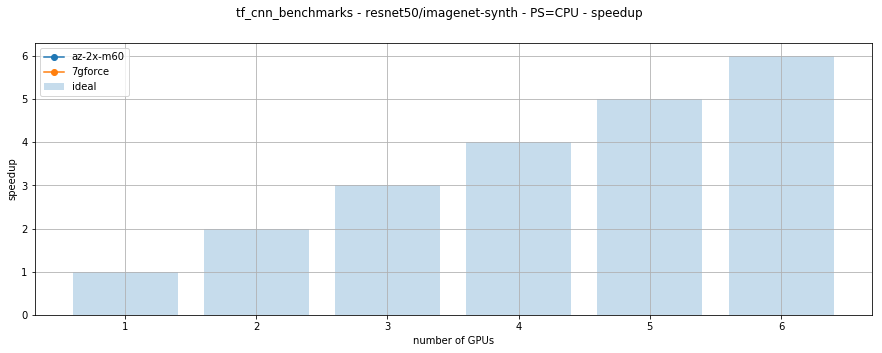

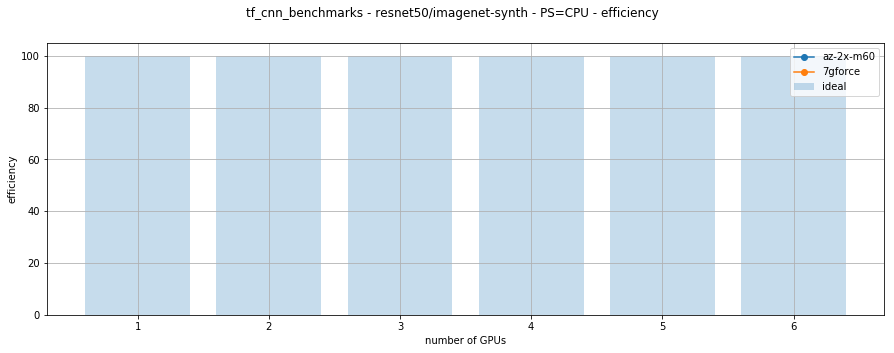

In [41]:
for model in ['inception3', 'resnet50']:
    for method in ['kuza55', 'avolkov1', 'tf_cnn_benchmarks']:
        for metric in ['speedup', 'efficiency']:
            plot_table(model, method, 'CPU', metric)

In [89]:
def plot_comparison_table(model, metric, machine):
    fig = plt.figure(figsize=(15,10))
    title = '%s/imagenet-synth - %s - %s' % (model, machine, metric)
    plt.suptitle(title)
    plt.xlabel('number of GPUs')
    plt.ylabel(metric)
    gpu_count = df['GPUs'].max()
    x_ideal = 1+np.arange(gpu_count)
    if metric == 'speedup':
        y_ideal = 1+np.arange(gpu_count)
    elif metric == 'efficiency':
        y_ideal = 100 * np.ones(gpu_count) # %
    plt.bar(x_ideal, y_ideal, alpha=0.25, label='ideal')
    for method in ['tf_cnn_benchmarks', 'avolkov1', 'kuza55']:
        for ps in ['CPU', 'GPU']:
            d = select(model, method, machine, ps)
            ls = 'o-' if ps == 'CPU' else 'x:'
            plt.plot(d['GPUs'], d[metric], ls, label='%s, PS=%s, %s' % (method, ps, machine))
    plt.grid(True)
    plt.legend()
    plt.savefig('comparison_%s_%s_%s.png' % (model, machine, metric))

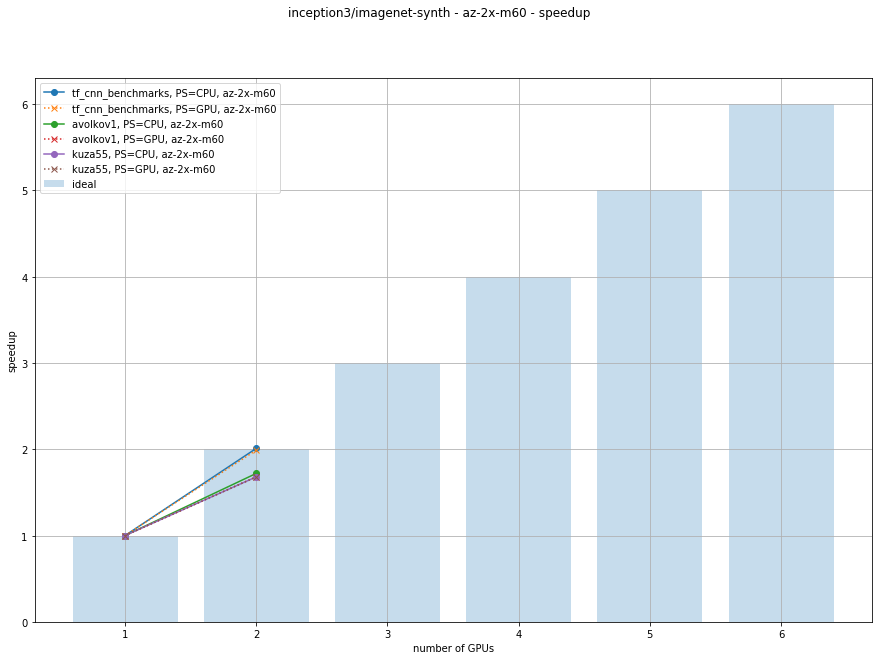

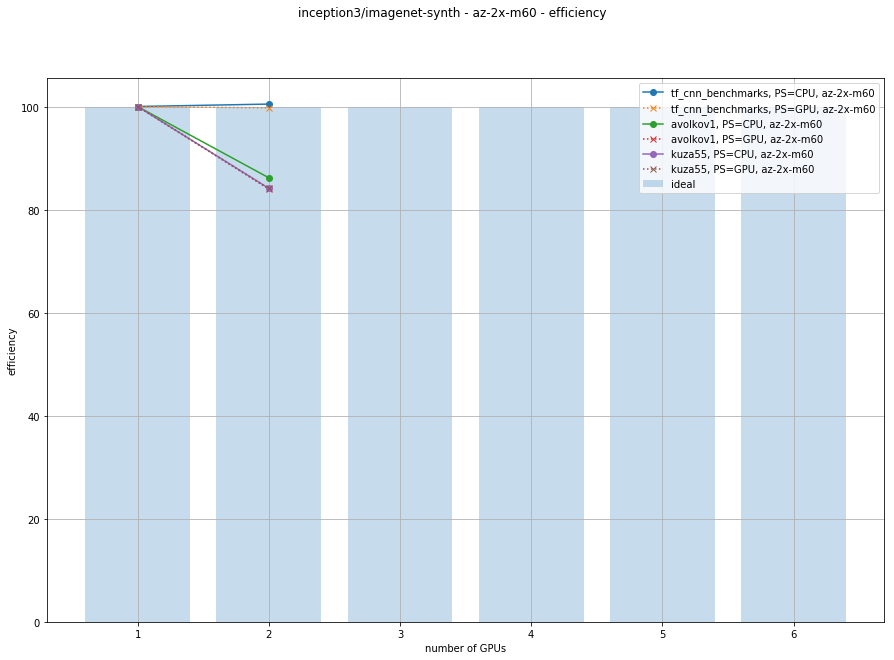

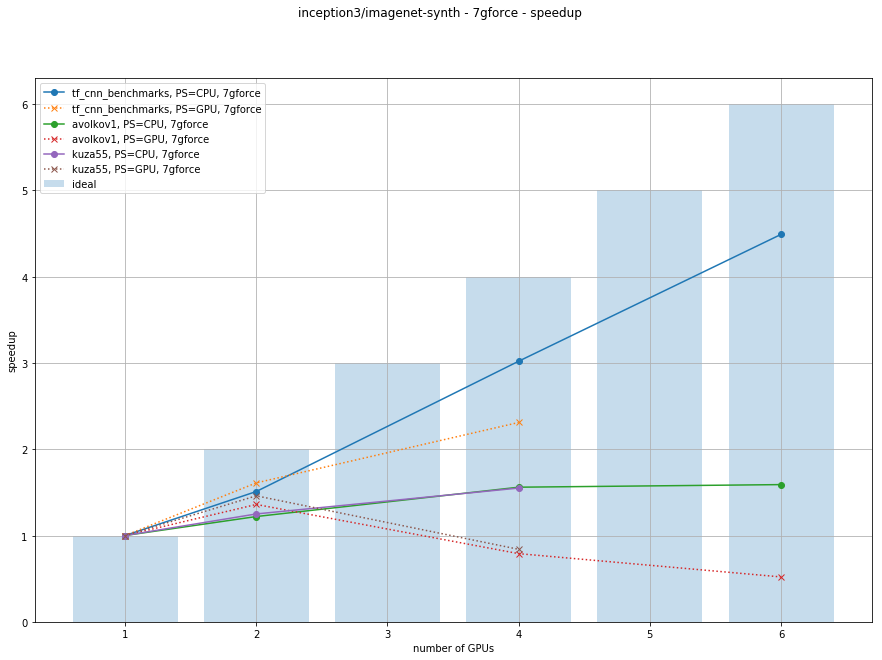

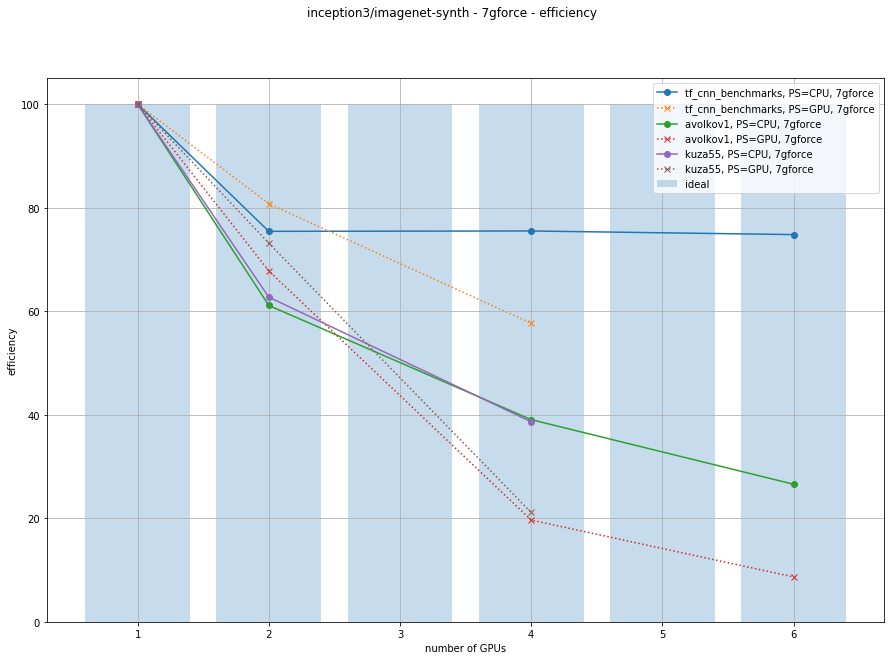

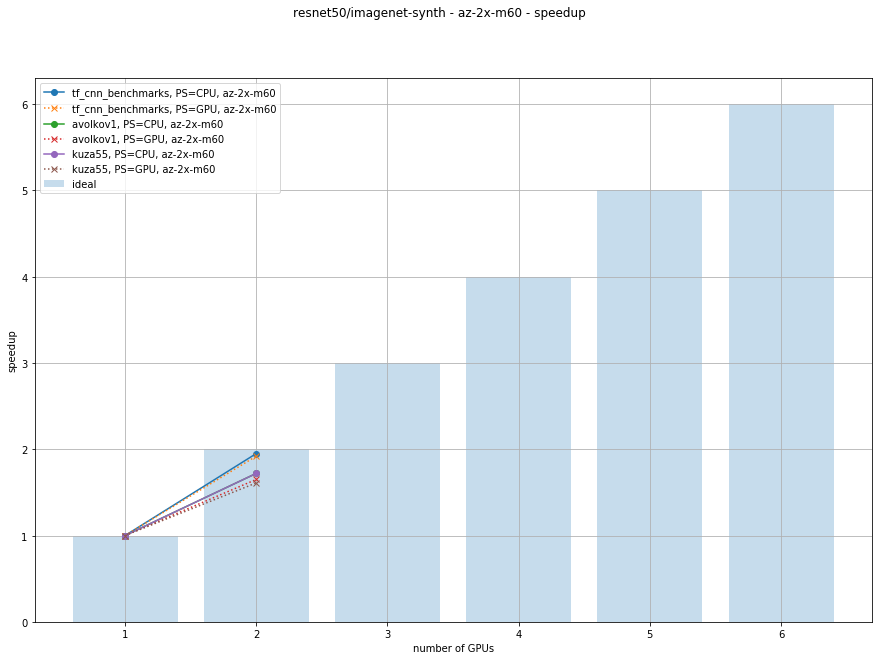

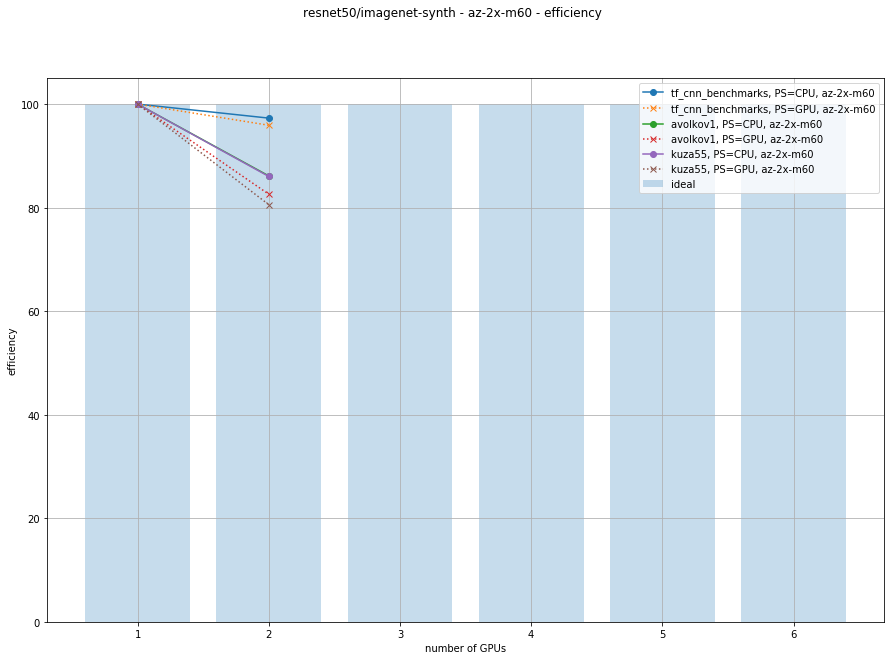

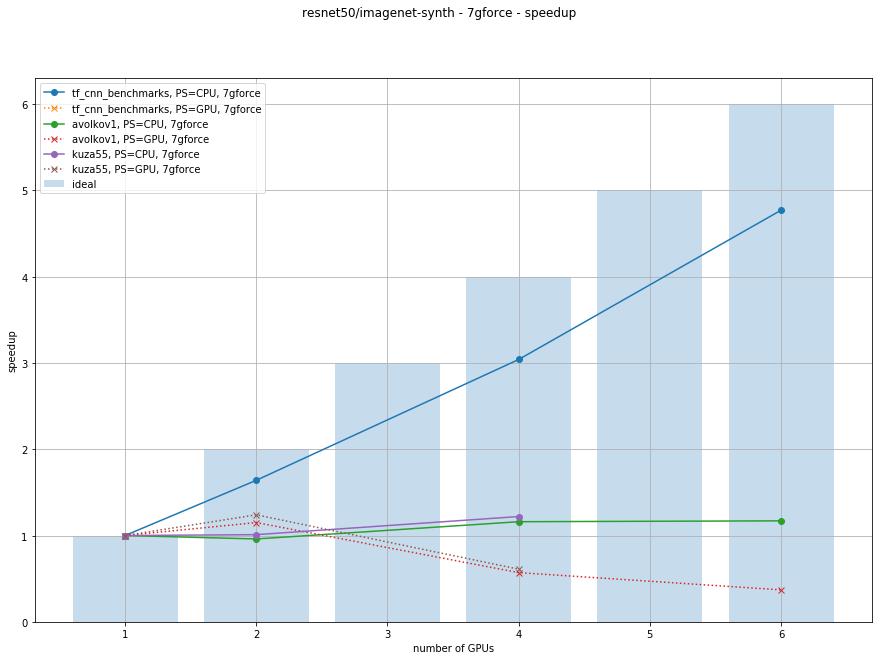

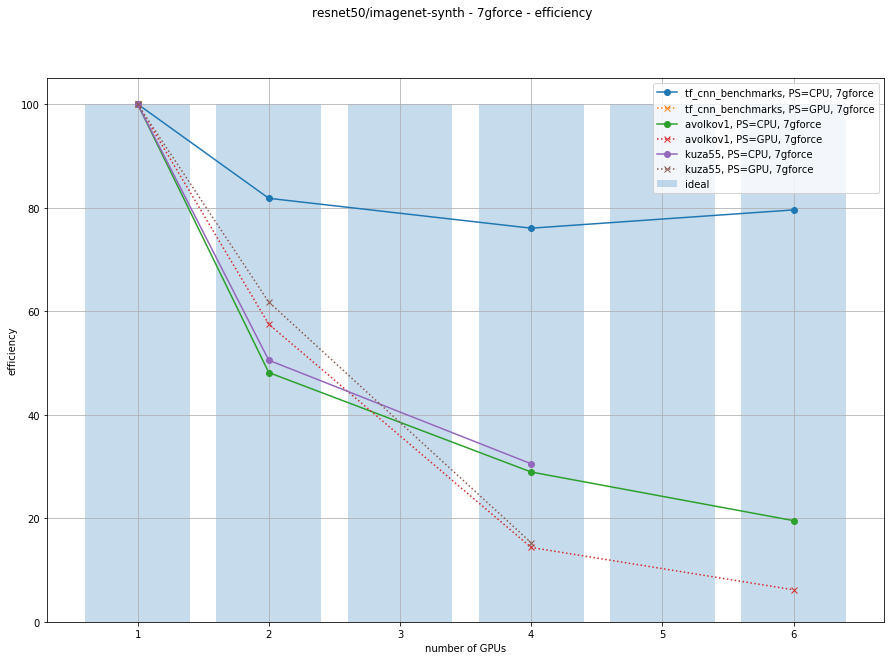

In [90]:
for model in ['inception3', 'resnet50']:
    for machine in ['az-2x-m60', '7gforce']:
        for metric in ['speedup', 'efficiency']:
            plot_comparison_table(model, metric, machine)